# Tytuł: Analiza wyników nauki na podstawie zmiennych opisowych uczniów

autor: Maciej Krakowiak

### Projekt będzie badać oraz przewidywać wyniki nauki na podstawie 30 zmiennych opisowych uczniów. Wyniki mierzone są na podstawie uzyskanych punktów z testuz matematyki. Badani uczniowie to osoby w wieku 15-22 lata z dwóch portugalskich szkół. Dane pochodzą z roku 2008.
### Główną motywacją do realizacji projektu jest chęć eksploracji fascynującego świata nauki i poszukiwania odpowiedzi na pytanie jakie predyktory najbardziej warunkują sukces człowieka w realiach szkolnej edukacji
### Głównymi celami projektu jest odpowiedź na pytanie jakie zmienne najbardziej warunkują osiągane wyniki w nauce uczniów oraz czy na podstawie jedynie podanych zmiennych opisowych można przewidzieć wynik z testu ucznia.

##### This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features and it was collected by using school reports and questionnaires.


##### school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
##### sex - student's sex (binary: 'F' - female or 'M' - male)
##### age - student's age (numeric: from 15 to 22)
##### address - student's home address type (binary: 'U' - urban or 'R' - rural)
##### famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
##### Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
##### Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade,  3 – secondary education or 4 – higher education)
##### Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
##### Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
##### Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
##### reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
##### guardian - student's guardian (nominal: 'mother', 'father' or 'other')
##### traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
##### studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
##### failures - number of past class failures (numeric: n if 1<=n<3, else 4)
##### schoolsup - extra educational support (binary: yes or no)
##### famsup - family educational support (binary: yes or no)
##### paid - extra paid classes within the course subject (Math) (binary: yes or no)
##### activities - extra-curricular activities (binary: yes or no)
##### nursery - attended nursery school (binary: yes or no)
##### higher - wants to take higher education (binary: yes or no)
##### internet - Internet access at home (binary: yes or no)
##### romantic - with a romantic relationship (binary: yes or no)
##### famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
##### freetime - free time after school (numeric: from 1 - very low to 5 - very high)
##### goout - going out with friends (numeric: from 1 - very low to 5 - very high)
##### Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
##### Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
##### health - current health status (numeric: from 1 - very bad to 5 - very good)
##### absences - number of school absences (numeric: from 0 to 93)

##### G1 - first period grade (numeric: from 0 to 20)
##### G2 - second period grade (numeric: from 0 to 20)
##### G3 - final grade (numeric: from 0 to 20, output target)


###### Source: P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.
        https://www.kaggle.com/datasets/henryshan/student-performance-prediction

### Ładowanie niezbędnych modułów

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, RandomizedSearchCV, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, r2_score, balanced_accuracy_score, make_scorer, f1_score, recall_score, precision_score, fbeta_score

### Ustawienie ziarna
Pomoże to w reprodukowalności osiągniętych rezulatów.

In [2]:
rng = 2030
np.random.seed(rng)
seed = np.random.RandomState(rng)

### Ustawienia wykresów

In [3]:
sns.set(
    rc={
        "figure.dpi": 100,
        "savefig.dpi": 300,
        "figure.figsize": (9, 9),
    }
)

### Ładowanie danych
##### student-mat.csv

In [4]:
df = pd.read_csv('student-mat.csv', sep=';')

# Eksploracyjna Analiza Danych

#### Szybki rzut oka na dane

In [5]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


#### Sprawdzenie czy występują w danych brakujące wartości

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Mamy 395 obserwacji, 33 zmienne. Ponieważ w żadnej kolumnie nie brakuje danych, nie trzeba przejmować się chociażby imputacją.

## Eksploracja cech
#### Usunięcie nadmiarowych kolumn

In [7]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


#### Sprawdzanie korelacji Pearsona

In [8]:
#sns.pairplot(df)

In [9]:
df.corr(numeric_only=True)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


Text(0.5, 1.0, 'Macierz korelacji')

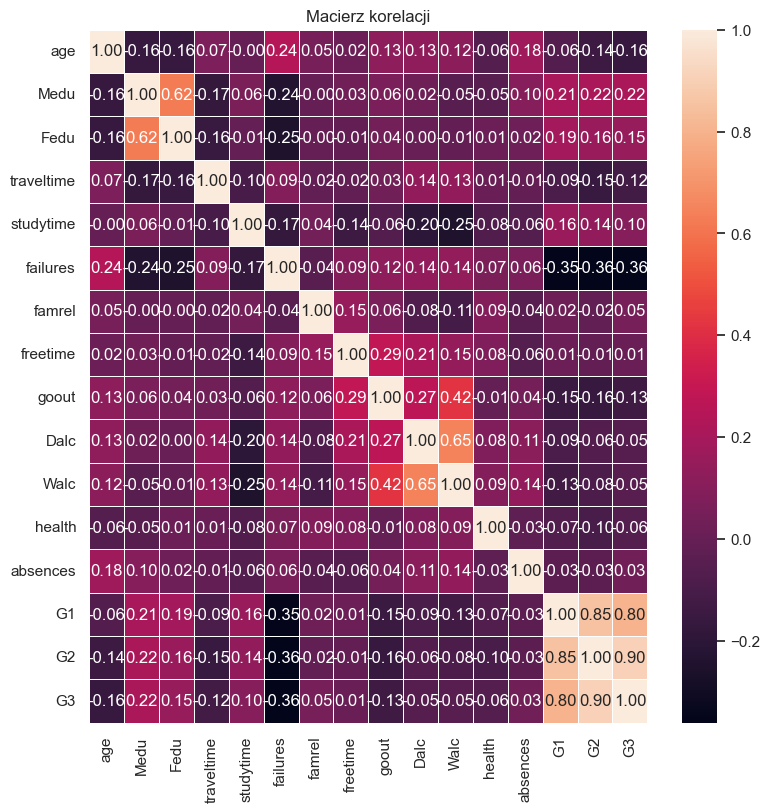

In [10]:
sns.heatmap(data=df.corr(numeric_only=True), annot=True, linewidths=0.5,fmt=".2f")
plt.title("Macierz korelacji")

#### Z badanej korelacji można wyszczególnić takie jak: 
    Medu i Fedu - korelacja na poziomie 0.62, czyli bardzo często wykształcenie matki jest podobne do wykształcenia ojca
    Dalc i Walc - korelacja na poziomie 0.65, czyli bardzo często uczeń pijący alkohol w ciągu tygodnia, pije również w weekend
    G3 a G1 i G2 - korelacja na poziomie 0.8 - 0.9, czyli prawie zawsze, wyniki ucznia z testu G1 i G2 mają odzwierciedlenie w teście końcowym, czyli G3
    
#### W związku z powyższym, dla zmniejszenia wymiarowości problemu, usunięte zostaną po jednym z dwóch wymienionych skorelowanych danych, a w przypadku zmiennych wyników testów G1, G2, G3 w danych pozostanie test G1 oraz G3

In [11]:
df.drop(['Fedu', 'Walc', 'G2'], axis=1, inplace=True)

#### Dla ujednolicenia systemnu nazw kolumn, zmieniono nazwy 'Pstatus', 'Mjob', 'Fjob', tak by zaczynały się z małej litery oraz zmieniono nazwy kolumn 'Medu' na 'pedu' - parents education, 'Dalc' na 'alc' - alcohol (bez rozróżnienia na Daily/Weekly),'G1' na 'gstart' oraz 'G3' na 'gfinal'

In [12]:
df.rename(columns = {'Pstatus' : 'pstatus', 'Medu' : 'pedu', 'Mjob' : 'mjob', 'Fjob' : 'fjob', 'Dalc' : 'alc', 'G1' : 'gstart','G3' : 'gfinal'}, inplace=True)

#### Zaznajomienie się z ilością występujących kategorii w kolumnach

In [13]:
for col in df:
    print(df.value_counts(col))

school
GP    349
MS     46
dtype: int64
sex
F    208
M    187
dtype: int64
age
16    104
17     98
15     82
18     82
19     24
20      3
21      1
22      1
dtype: int64
address
U    307
R     88
dtype: int64
famsize
GT3    281
LE3    114
dtype: int64
pstatus
T    354
A     41
dtype: int64
pedu
4    131
2    103
3     99
1     59
0      3
dtype: int64
mjob
other       141
services    103
at_home      59
teacher      58
health       34
dtype: int64
fjob
other       217
services    111
teacher      29
at_home      20
health       18
dtype: int64
reason
course        145
home          109
reputation    105
other          36
dtype: int64
guardian
mother    273
father     90
other      32
dtype: int64
traveltime
1    257
2    107
3     23
4      8
dtype: int64
studytime
2    198
1    105
3     65
4     27
dtype: int64
failures
0    312
1     50
2     17
3     16
dtype: int64
schoolsup
no     344
yes     51
dtype: int64
famsup
yes    242
no     153
dtype: int64
paid
no     214
yes    181
d

#### Poszukiwania wartości odstających
Z uwagi na to, że tylko kolumny zawierające nieobecności oraz wynik końcowy testu to kolumny z wartościami liczbowymi, a nie kategorycznymi, przyjrzymy się tylko im

Text(0.5, 1.0, 'Nieobecności')

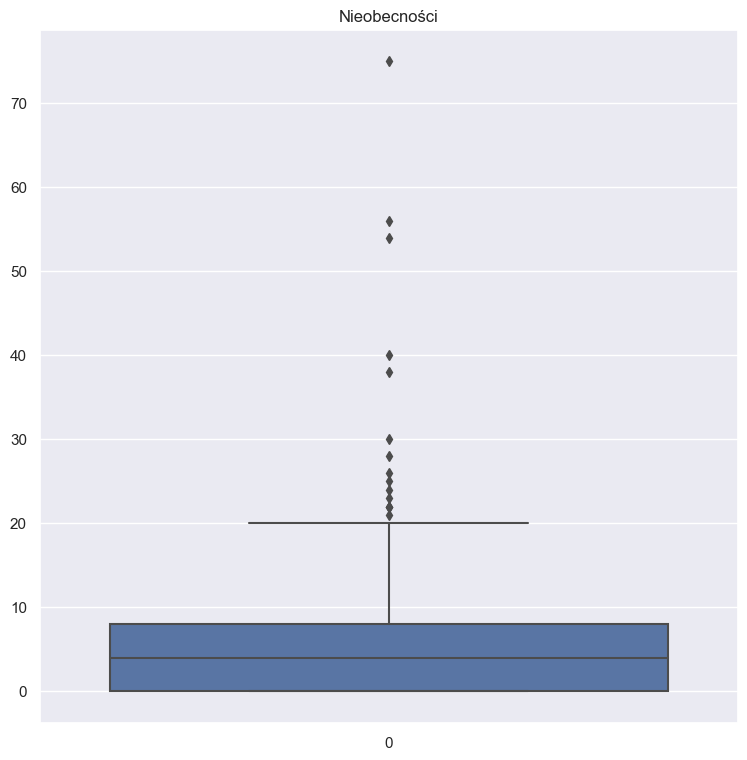

In [14]:
sns.boxplot(data=df['absences'])
plt.title('Nieobecności')

Jak widać wykres pudełkowy pokazuje wiele potencjalnych outlierów, więc warto się im przyjrzeć bliżej

In [15]:
df[df['absences']>20]

,school,sex,age,address,famsize,pstatus,pedu,mjob,fjob,reason,...,internet,romantic,famrel,freetime,goout,alc,health,absences,gstart,gfinal
40,GP,F,16,U,LE3,T,2,other,other,home,...,yes,yes,3,3,3,1,3,25,7,11
74,GP,F,16,U,GT3,T,3,other,services,home,...,yes,no,4,3,3,2,5,54,11,11
103,GP,F,15,U,GT3,T,3,services,other,home,...,yes,no,4,3,5,1,2,26,7,6
183,GP,F,17,U,LE3,T,3,other,other,reputation,...,yes,yes,5,3,3,2,1,56,9,8
198,GP,F,17,U,GT3,T,4,services,teacher,home,...,yes,no,4,2,4,2,2,24,18,18
205,GP,F,17,U,GT3,T,3,at_home,services,home,...,yes,yes,4,4,3,3,5,28,10,9
216,GP,F,17,U,GT3,T,4,other,other,reputation,...,yes,yes,3,4,5,2,1,22,6,4
260,GP,F,18,U,GT3,T,4,services,other,home,...,yes,yes,3,1,2,1,2,21,17,18
276,GP,F,18,R,GT3,A,3,other,services,home,...,yes,yes,4,1,1,1,5,75,10,9
277,GP,M,18,U,GT3,T,4,teacher,services,home,...,yes,no,3,2,4,1,3,22,9,9


##### Warto zauważyć, że na pierwszy rzut oka duża ilość nieobecności nie wpływa bardzo negatywnie na wynik końcowy testu, spójrzmy na średni wynik osób z dużą ilością nieobecności w porównaniu do całości

In [16]:
print('Średni wynik testu uczniów z dużą ilością nieobecności:',round(df[df['absences']>20]['gfinal'].mean(),2))
print('Średni wynik testu wszystkich uczniów:',round(df['gfinal'].mean(),2))

Średni wynik testu uczniów z dużą ilością nieobecności: 10.27
Średni wynik testu wszystkich uczniów: 10.42


##### Jako, że średni wynik obu grup jest bardzo zbliżony do siebie, można zaryzykować stwierdzenie, że duża ilość nieobecności nie wpływa na wynik testu, osoba z najmniejszym uzyskanym wynikiem z grupy z dużą ilością nieobecności (4 punkty) ma stosunkowo niewiele nieobecności (22 nieobecności), w związku z czym podjąłem decyzję o nie usuwaniu tej grupy jako outlierów

##### Dla klarowności rzut okiem na rozkład ilości nieobecności

Text(0.5, 1.0, 'Rozkład Nieobecności')

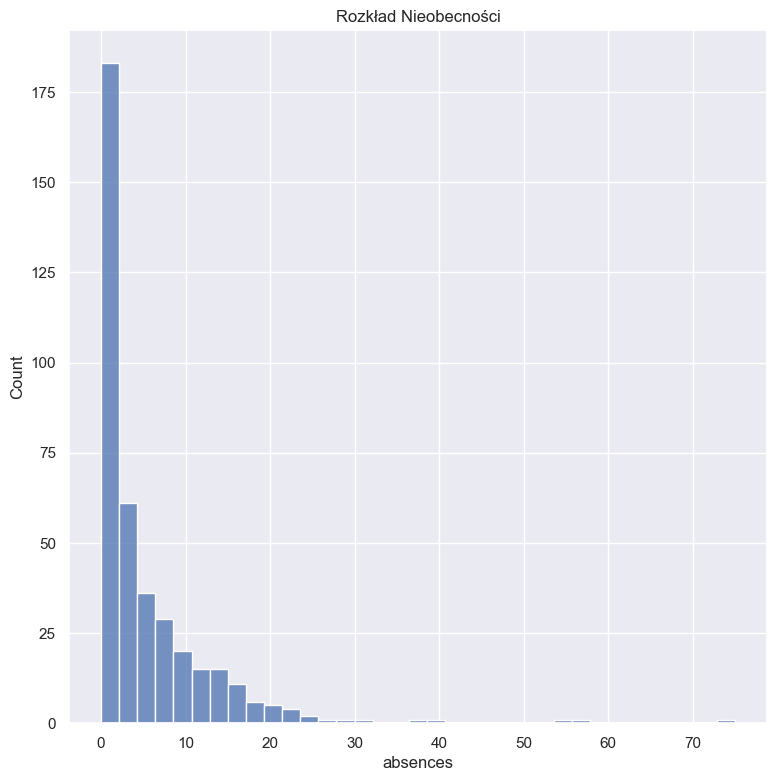

In [17]:
sns.histplot(df['absences'])
plt.title('Rozkład Nieobecności')

##### Analiza wartości odstających dla kolumny z wynikiem testu 'gstart'

Text(0.5, 1.0, 'Wyniki pierwszego egzaminu')

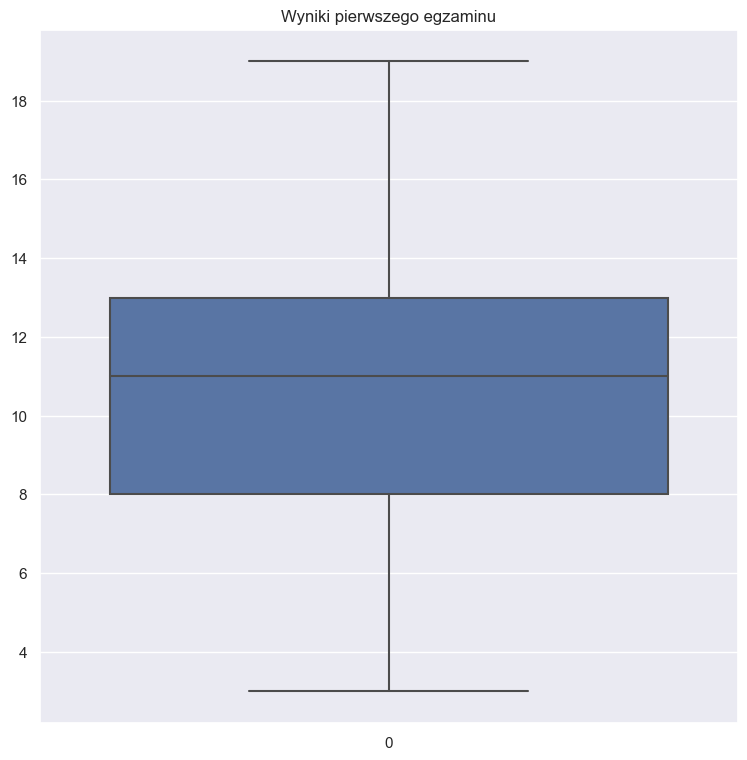

In [18]:
sns.boxplot(df['gstart'])
plt.title('Wyniki pierwszego egzaminu')

 Ponieważ wykres pudełkowy nie wskazuje na potencjalnych outlierów, sprawdźmy rozkład ilościowy danych

Text(0.5, 1.0, 'Rozkład wyników pierwszego egzaminu')

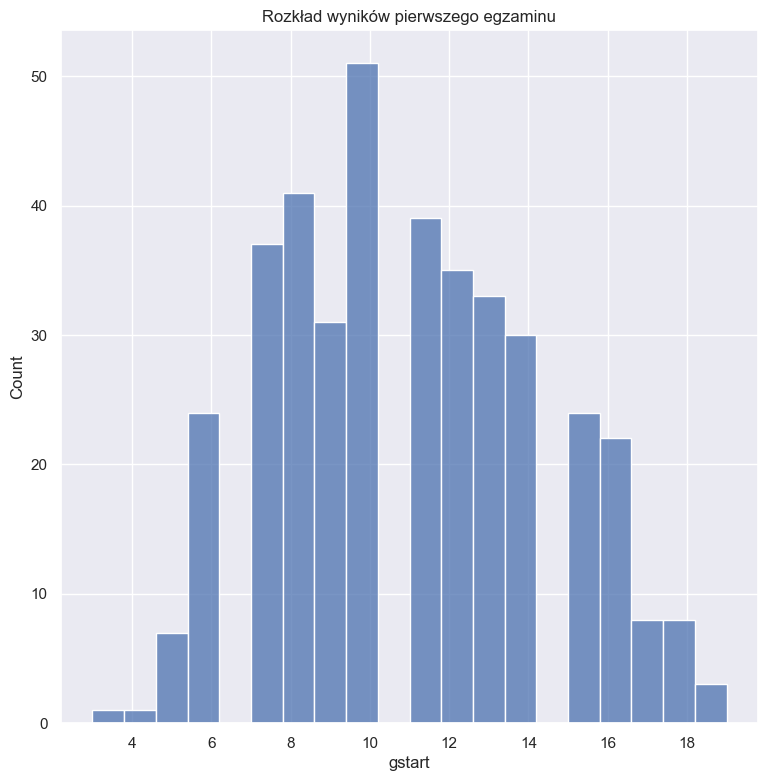

In [19]:
sns.histplot(df['gstart'], bins=20)
plt.title('Rozkład wyników pierwszego egzaminu')

Po analizie wykresów można stwierdzić brak wartości odstających w kolumnie 'gstart'

##### Oraz analiza wartości odstających dla kolumny z wynikiem testu 'gfinal'

Text(0.5, 1.0, 'Wyniki egzaminu końcowego')

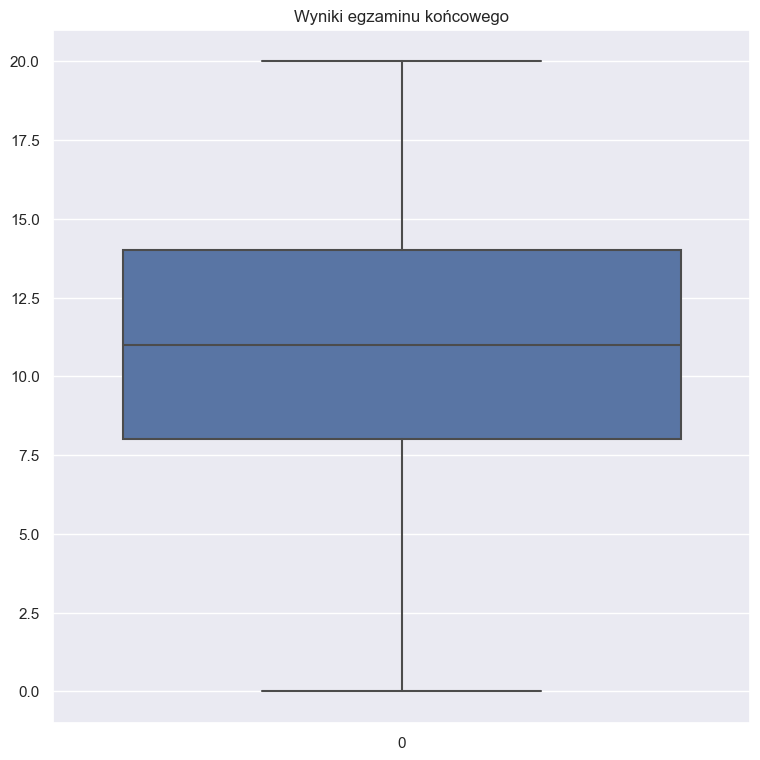

In [20]:
sns.boxplot(df['gfinal'])
plt.title('Wyniki egzaminu końcowego')

##### Ponieważ wykres pudełkowy nie wskazuje na potencjalnych outlierów, sprawdźmy rozkład ilościowy danych

Text(0.5, 1.0, 'Rozkład wyników egzaminu końcowego')

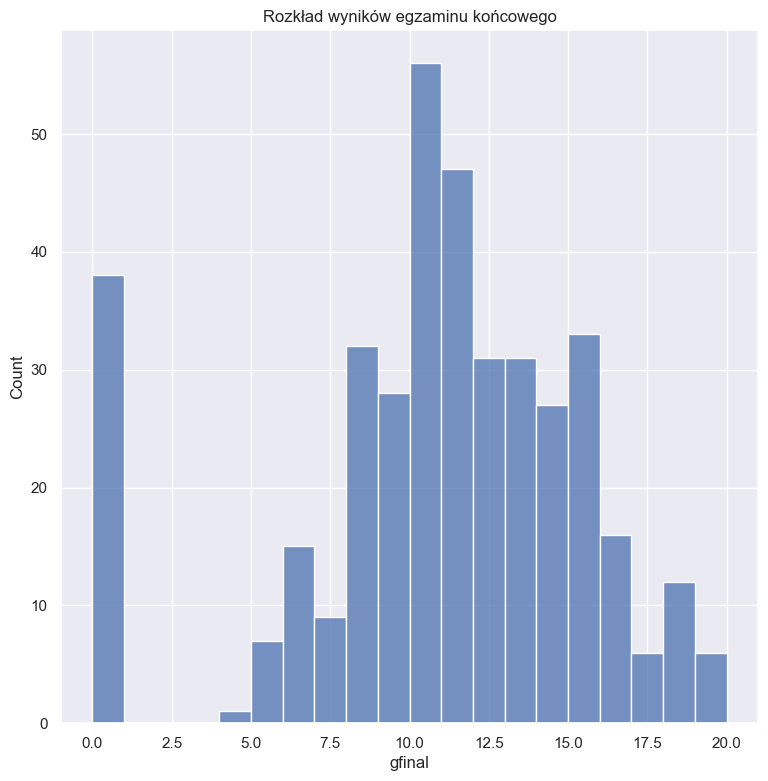

In [21]:
sns.histplot(df['gfinal'], bins=20)
plt.title('Rozkład wyników egzaminu końcowego')

##### Histogram pokazuje, że rozkład ilościowy danych w kolumnie jest zbliżony do rozkładu normalnego, jednak warto zwrócić uwagę na sporą ilość przypadków, gdzie wynik z testu wyniósł dokładnie 0
##### Przeanalizujmy przypadki uczniów, którzy otrzymali taki wynik

In [22]:
df[df['gfinal'] == 0]

,school,sex,age,address,famsize,pstatus,pedu,mjob,fjob,reason,...,internet,romantic,famrel,freetime,goout,alc,health,absences,gstart,gfinal
128,GP,M,18,R,GT3,T,2,services,other,reputation,...,yes,no,3,3,3,1,4,0,7,0
130,GP,F,15,R,GT3,T,3,services,teacher,course,...,yes,yes,4,2,2,2,5,0,12,0
131,GP,F,15,U,GT3,T,1,at_home,other,course,...,yes,yes,4,3,3,1,4,0,8,0
134,GP,M,15,R,GT3,T,3,at_home,teacher,course,...,no,yes,5,3,3,1,5,0,9,0
135,GP,F,15,U,GT3,T,4,services,at_home,course,...,yes,yes,4,3,3,1,5,0,11,0
136,GP,M,17,R,GT3,T,3,at_home,other,course,...,no,no,5,4,5,2,5,0,10,0
137,GP,F,16,U,GT3,A,3,other,other,course,...,yes,yes,4,3,2,1,5,0,4,0
140,GP,M,15,U,GT3,T,4,teacher,services,course,...,yes,no,2,2,2,1,3,0,7,0
144,GP,M,17,U,GT3,T,2,other,other,home,...,yes,no,5,4,5,1,5,0,5,0
146,GP,F,15,U,GT3,T,3,health,services,home,...,yes,no,3,3,2,1,3,0,6,0


#### Z uwagi na brak jakichkolwiek wartości zmiennych mogących, na pierwszy rzut oka, wskazywać na wynik egzaminu równy 0 (np. picie dużej ilości alkoholu, zatrważająca ilość nieobecności, lub niesprzyjające relacje z rodzicami) rekordy te zostały uznane za rekordy, które nie odzwierciedlają wyników nauki danego ucznia, lecz są błędem zapisu, np. z powodu nieprzystąpienia ucznia do egzaminu (w takim wypadku nie można dojść do jego prawdziwego rezultatu nauki i zakładanie, że dostał 0 punktów z egzaminu jest założeniem niepoprawnym, które może spowodować, że model predykcji ocen będzie niewłaściwy).

### Dlatego podjęta została decyzja o usunięciu rekordów, dla których, z różnych przyczyn, wynik z egzaminu końcowego jest równy 0

In [23]:
gfinal_zero_mask = df['gfinal'] == 0
df = df[~gfinal_zero_mask]

### Zakodowanie zmiennych numerycznych jako zmiennych kategorycznych

#### Wprowadzenie kategorii do zmiennej 'absences' oraz zmiennej celu 'gfinal'
#### Dla nieobecności: 1 : [0,5]; 2 : [6,10]; 3 : [11,15]; 4 : [16, 20]; 5 : [21,np.inf)
#### Dla oceny z testu: 1 : [0,5]; 2 : [6,9]; 3 : [10,13]; 4 : [14,17]; 5 : [18,20]

In [24]:
df['absences'] = pd.cut(df['absences'],
                       [0,6,11,16,21,np.inf],
                       right=False,
                       labels=[1,2,3,4,5])

In [25]:
df['gstart'] = pd.cut(df['gstart'],
                     [0,6,10,14,18,21],
                     right=False,
                     labels=[1,2,3,4,5])

In [26]:
df['gfinal'] = pd.cut(df['gfinal'],
                     [0,6,10,14,18,21],
                     right=False,
                     labels=[1,2,3,4,5])

In [27]:
df['absences'].value_counts()

1    211
2     80
3     33
4     18
5     15
Name: absences, dtype: int64

In [28]:
df['gstart'].value_counts()

3    151
2    105
4     84
5     11
1      6
Name: gstart, dtype: int64

In [29]:
df['gfinal'].value_counts()

3    165
2     84
4     82
5     18
1      8
Name: gfinal, dtype: int64

#### Kodowanie zmiennych kategorycznych

In [30]:
label = ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian',
         'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

In [31]:
for col in label:
    df[col] = LabelEncoder().fit_transform(df[col])

#### Sprawdzenie poprawności zakodowania danych

In [32]:
df

,school,sex,age,address,famsize,pstatus,pedu,mjob,fjob,reason,...,internet,romantic,famrel,freetime,goout,alc,health,absences,gstart,gfinal
0,0,0,18,1,0,0,4,0,4,0,...,0,0,4,3,4,1,3,2,1,2
1,0,0,17,1,0,1,1,0,2,0,...,1,0,5,3,3,1,3,1,1,2
2,0,0,15,1,1,1,1,0,2,2,...,1,0,4,3,2,2,3,2,2,3
3,0,0,15,1,0,1,4,1,3,1,...,1,1,3,2,2,1,5,1,4,4
4,0,0,16,1,0,1,3,2,2,1,...,0,0,4,3,2,1,5,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,3,3,0,...,0,0,5,5,4,4,4,3,2,2
391,1,1,17,1,1,1,3,3,3,0,...,1,0,2,4,5,3,2,1,4,4
392,1,1,21,0,0,1,1,2,2,0,...,0,0,5,5,3,3,3,1,3,2
393,1,1,18,0,1,1,3,3,2,0,...,1,0,4,4,1,3,5,1,3,3


##### Sprawdzenie czy w wyniku zakodowania danych nie powstały nowe korelacje

<AxesSubplot:>

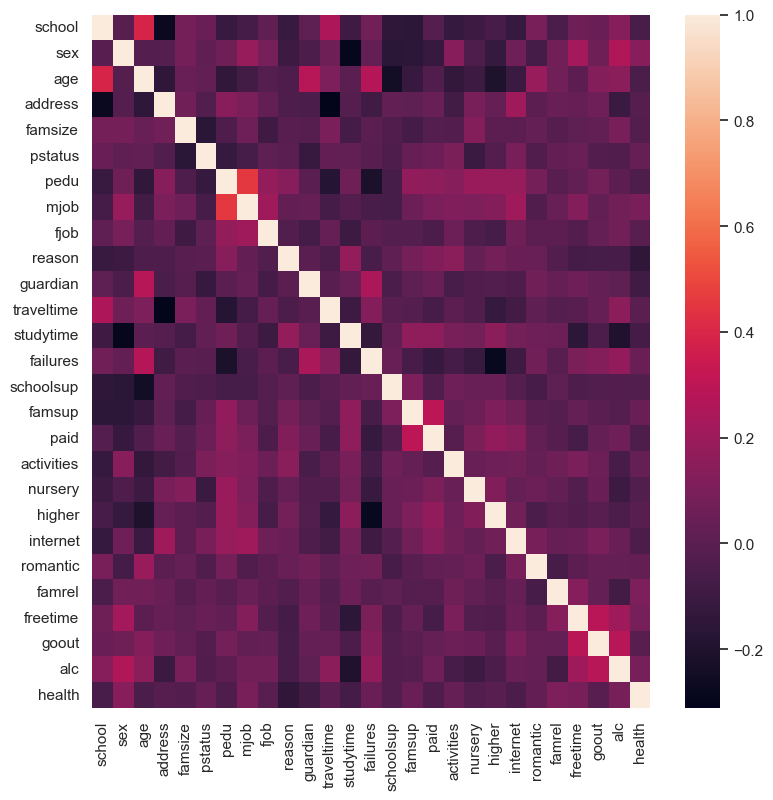

In [33]:
sns.heatmap(df.corr(numeric_only=True))

In [34]:
df[['mjob', 'pedu']].corr(numeric_only=True)

,mjob,pedu
mjob,1.000000,0.455945
pedu,0.455945,1.000000


Jedyna wyróżniająca się korelacja ma wartość 0.45, czyli za małą, aby wyrzucić ze zbioru danych

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      357 non-null    int32   
 1   sex         357 non-null    int32   
 2   age         357 non-null    int64   
 3   address     357 non-null    int32   
 4   famsize     357 non-null    int32   
 5   pstatus     357 non-null    int32   
 6   pedu        357 non-null    int64   
 7   mjob        357 non-null    int32   
 8   fjob        357 non-null    int32   
 9   reason      357 non-null    int32   
 10  guardian    357 non-null    int32   
 11  traveltime  357 non-null    int64   
 12  studytime   357 non-null    int64   
 13  failures    357 non-null    int64   
 14  schoolsup   357 non-null    int32   
 15  famsup      357 non-null    int32   
 16  paid        357 non-null    int32   
 17  activities  357 non-null    int32   
 18  nursery     357 non-null    int32   
 19  higher  

Ponieważ poza wiekiem wszystkie dane mają kategorie, zdecydowałem się na zmianę typu danych z 'int' na 'category'

In [36]:
df['school'] = df['school'].astype('category')
df['sex'] = df['sex'].astype('category')

In [37]:
for col in df.iloc[:,3:-3]:
    df[col] = df[col].astype('category')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      357 non-null    category
 1   sex         357 non-null    category
 2   age         357 non-null    int64   
 3   address     357 non-null    category
 4   famsize     357 non-null    category
 5   pstatus     357 non-null    category
 6   pedu        357 non-null    category
 7   mjob        357 non-null    category
 8   fjob        357 non-null    category
 9   reason      357 non-null    category
 10  guardian    357 non-null    category
 11  traveltime  357 non-null    category
 12  studytime   357 non-null    category
 13  failures    357 non-null    category
 14  schoolsup   357 non-null    category
 15  famsup      357 non-null    category
 16  paid        357 non-null    category
 17  activities  357 non-null    category
 18  nursery     357 non-null    category
 19  higher  

In [39]:
for col in df:
    print(df.value_counts(col))

school
0    315
1     42
dtype: int64
sex
0    185
1    172
dtype: int64
age
16    97
17    90
15    76
18    70
19    19
20     3
21     1
22     1
dtype: int64
address
1    279
0     78
dtype: int64
famsize
0    250
1    107
dtype: int64
pstatus
1    318
0     39
dtype: int64
pedu
4    125
3     90
2     89
1     50
0      3
dtype: int64
mjob
2    127
3     94
4     54
0     50
1     32
dtype: int64
fjob
2    196
3    100
4     26
1     18
0     17
dtype: int64
reason
0    126
3     99
1     97
2     35
dtype: int64
guardian
1    248
0     82
2     27
dtype: int64
traveltime
1    236
2     95
3     19
4      7
dtype: int64
studytime
2    182
1     92
3     59
4     24
dtype: int64
failures
0    294
1     40
2     12
3     11
dtype: int64
schoolsup
0    307
1     50
dtype: int64
famsup
1    219
0    138
dtype: int64
paid
0    184
1    173
dtype: int64
activities
1    180
0    177
dtype: int64
nursery
1    286
0     71
dtype: int64
higher
1    343
0     14
dtype: int64
internet
1    29

#### Wizualizacja balansu klas zmiennej celu

Text(0.5, 1.0, 'Rozkład danych zmiennej celu')

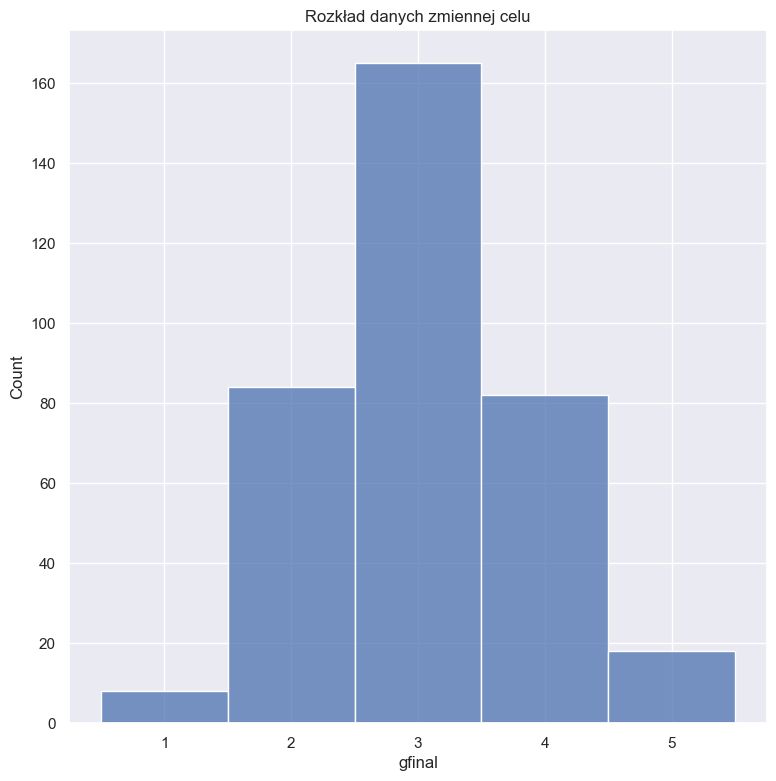

In [40]:
sns.histplot(data=df['gfinal'])
plt.title('Rozkład danych zmiennej celu')

In [41]:
round((len(df[df['gfinal']==1]) + len(df[df['gfinal']==5])) / len(df['gfinal']),2)

0.07

Ponieważ rozkład klas jest zbliżony do rozkładu normalnego i suma ilości klasy 1 i 5 do całości klas, wynosi 7%, mamy doczynienia z niezbalansowaniem klas. Będziemy musieli dobrać w związku z tym odpowiednią strategię do uczenia modelu, napewno będziemy musieli zadbać, żeby odpowiednia statystyka pojawiła się w zbiorze walidacyjnym (słowo kluczowe: stratify)

## Modelowanie danych, predykcja wyników ucznia i szukanie najistotniejszych predyktorów

### Przygotowanie zbioru treningowego i testowego

In [42]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

### Przygotowanie CrossValidation (StratifiedKFold)
W związku z wydzieleniem zbioru treningowego i testowego potrzebujemy jeszcze zbioru walidacyjnego, który pomoże nam oceniać postępy podczas modelowania. Użyjemy do tego "kross-walidacji":

In [43]:
cv = StratifiedKFold(n_splits=5)

## Modelowanie
#### Wybór modelu
Zacznijmy od wstępnej oceny modeli, tuningiem hiperparametrów zajmiemy się później. Stwórzmy kilka modeli i wybierzmy najbardziej obiecujący z nich:

    Baseline:
        uniform: zgadywanie z jednakowym prawdopodobieństwem
        strarified: zgadywanie z prawdopodobieństwem odpowiadającym rozłożeniu klas
        majority: zgadywanie, zawsze podawana jest klasa większościowa (w tym przypadku ocena 3)
    DecisionTree:
        Prosty w interpretacji klasyfikator, wytypowany w rozważaniach nad zbiorem niezbalansowanym
    RandomForrest:
        Klasyfikator wytypowany w rozważaniach nad zbiorem niezbalansowanym
    GradientBoosting:
        Klasyfikator wytypowany w rozważaniach nad zbiorem niezbalansowanym
        
Modele Baseline posłużą nam jako punkt odniesienia. Nie możemy zejść poniżej wyników uzyskiwanych przez te modele, ponieważ w takim przypadku bardziej opłacalne byłoby zgadywanie.

In [44]:
models = {
    "Baseline-uniform": DummyClassifier(strategy="uniform", random_state=seed),
    "Baseline-stratified": DummyClassifier(
        strategy="stratified", random_state=seed
    ),
    "Baseline-majority": DummyClassifier(
        strategy="most_frequent", random_state=seed
    ),
    "DecisionTree": DecisionTreeClassifier(
        random_state=seed, class_weight="balanced"
    ),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=seed),
    "RandomForrest": RandomForestClassifier(
        random_state=seed, class_weight="balanced"
    ),
}

In [45]:
balanced_acc = make_scorer(balanced_accuracy_score, adjusted=False)
precision = make_scorer(precision_score, zero_division=0, average="weighted")
recall = make_scorer(recall_score, zero_division=0, average="weighted")
f1 = make_scorer(fbeta_score, beta=1, zero_division=0,  average="weighted")

In [46]:
results = pd.DataFrame()
for name, model in models.items():
    cv_score = cross_validate(
        model,
        cv=cv,
        X=X,
        y=y,
        scoring={
            "accuracy": "accuracy",
            "balanced_accuracy": balanced_acc,
            "precision": precision,
            "recall": recall,
            "f1": f1
        },
    )
    results = pd.concat(
        [
            results,
            pd.DataFrame(
                {
                    "Model": [name],
                    "Acc": [np.round(np.mean(cv_score["test_accuracy"]), 2)],
                    "Balanced Acc": [np.round(np.mean(cv_score["test_balanced_accuracy"]), 2)],
                    "Precision": [np.round(np.mean(cv_score["test_precision"]), 2)],
                    "Recall": [np.round(np.mean(cv_score["test_recall"]), 2)],
                    "F1": [np.round(np.mean(cv_score["test_f1"]), 2)],
                }
            ),
        ],
        ignore_index=True,
    )

### Metryki

##### Celem będzie zmaksymalizowanie metryki Balanced Accuracy, czyli metryki odpowiadające za ilość poprawnych predykcji z uwzględnieniem wag (dostosowując metrykę do braku balansu pośród klas)
##### Np.: Model Baseline-majority zgadując dla każdego przypadku najczęściej występującą klasę (3) osiągnął 46% Accuracy (46% wszystkich ocen stanowi ocena 3)
    W metryce Balanced Accuracy osiągnął wynik 20% (Z uwagi na zmienioną wagę klas w przypadku niezbalansowanego zbioru). Powoduje zmniejsze opłacalności odgadywania jednej, najczęściej wystepującej klasy. Maksymalizacja tej metryki pozwoli jak najbardziej oddalić się od modelu przewidującego zwyczajnie wartość najczęściej pojawiającą się w zmiennej celu
    
    
Mimo wyboru metryki, model zostanie zewaluowany również na pozostałych - edukacyjnie, aby sprawdzić jak się zachowują.

In [47]:
results

,Model,Acc,Balanced Acc,Precision,Recall,F1
0,Baseline-uniform,0.25,0.25,0.36,0.25,0.28
1,Baseline-stratified,0.29,0.20,0.31,0.29,0.30
2,Baseline-majority,0.46,0.20,0.21,0.46,0.29
3,DecisionTree,0.54,0.44,0.55,0.54,0.54
4,GradientBoostingClassifier,0.60,0.44,0.60,0.60,0.59
5,RandomForrest,0.61,0.36,0.58,0.61,0.57


Na domyślnych ustawieniach, RandomForest osiągnął najlepszy wynik spośród metryk dla Accuracy, jednak modelem z lepszyą metryką - Balanced Accuracy jest DecisionTree. Zajmijmy się tuningiem hiperparametrów dla tego modelu.

In [48]:
cv_score = cross_validate(
DecisionTreeClassifier(random_state=seed, class_weight="balanced"),
cv=cv,
X=X,
y=y,
scoring={
    "accuracy": "accuracy",
    "balanced_accuracy": balanced_acc,
    "precision": precision,
    "recall": recall,
    "f1": f1
},
return_train_score=True
)
tree_results = pd.DataFrame(
        {
            "Model": ['DecisionTree'],
            "Acc_train": [np.round(np.mean(cv_score["train_accuracy"]), 2)],
            "Acc_test": [np.round(np.mean(cv_score["test_accuracy"]), 2)],
            "Balanced Acc_train": [np.round(np.mean(cv_score["train_balanced_accuracy"]), 2)],
            "Balanced Acc_test": [np.round(np.mean(cv_score["test_balanced_accuracy"]), 2)],
            "Precision": [np.round(np.mean(cv_score["test_precision"]), 2)],
            "Recall": [np.round(np.mean(cv_score["test_recall"]), 2)],
            "F1": [np.round(np.mean(cv_score["test_f1"]), 2)],
        })


##### Warto zwrócić uwagę na fakt, że model na domyślnych parametrach jest przeuczony. Poniżej porzedstawiona zostały przedstawione wyniki również dla zbioru treningowego dla metryk Accuracy oraz Balanced Accuracy

In [49]:
tree_results

,Model,Acc_train,Acc_test,Balanced Acc_train,Balanced Acc_test,Precision,Recall,F1
0,DecisionTree,1.0,0.54,1.0,0.44,0.55,0.54,0.54


### Tuning hiperparametrów

#### Inspekcja hiperparametrów

In [50]:
model = DecisionTreeClassifier(random_state=seed, class_weight="balanced")

In [51]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': RandomState(MT19937) at 0x274E5FAB040,
 'splitter': 'best'}

#### Wartości zainspirowane wynikami wyszukiwania "How to tune a Decision Tree?" oraz poprzez obserwację empiryczną. 

In [52]:
params = {
    'random_state': [seed],
    'class_weight': ["balanced"],
    'min_samples_split': np.linspace(2,40, num=39, dtype=np.int32),
    'min_samples_leaf': np.linspace(2, 20, num=19, dtype=np.int32),
    'min_impurity_decrease': np.linspace(0, 0.15, num=50),
    'max_depth': np.linspace(3, 10, num=8, dtype=np.int32),
    'max_features': np.linspace(5, 35, num=30, dtype=np.int32),
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes': np.linspace(2, 20, num=19, dtype=np.int32),
}

In [53]:
params

{'random_state': [RandomState(MT19937) at 0x274E5FAB040],
 'class_weight': ['balanced'],
 'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40]),
 'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20]),
 'min_impurity_decrease': array([0.        , 0.00306122, 0.00612245, 0.00918367, 0.0122449 ,
        0.01530612, 0.01836735, 0.02142857, 0.0244898 , 0.02755102,
        0.03061224, 0.03367347, 0.03673469, 0.03979592, 0.04285714,
        0.04591837, 0.04897959, 0.05204082, 0.05510204, 0.05816327,
        0.06122449, 0.06428571, 0.06734694, 0.07040816, 0.07346939,
        0.07653061, 0.07959184, 0.08265306, 0.08571429, 0.08877551,
        0.09183673, 0.09489796, 0.09795918, 0.10102041, 0.10408163,
        0.10714286, 0.11020408, 0.11326531, 0.11632653, 0.11938776,
        0.12244898, 0.125

In [54]:
# przestrzeń parametrow do eksploracji jest bardzo duża, więc zastosujmy losowe przeszukiwanie
rs = RandomizedSearchCV(
    model,
    params,
    cv=cv,
    scoring=balanced_acc,
    random_state=seed,
    n_iter=20, #n_iter=1000
    refit=False,
).fit(
    X,
    y,
)

In [55]:
best_params = rs.best_params_
best_params

{'random_state': RandomState(MT19937) at 0x274E5FAB040,
 'min_samples_split': 3,
 'min_samples_leaf': 5,
 'min_impurity_decrease': 0.055102040816326525,
 'max_leaf_nodes': 17,
 'max_features': 22,
 'max_depth': 8,
 'criterion': 'entropy',
 'class_weight': 'balanced'}

In [56]:
#zapisane najlepsze wylosowane parametry
best_params = {
 'random_state': seed,
 'min_samples_split': 15,
 'min_samples_leaf': 4,
 'min_impurity_decrease': 0.025,
 'max_leaf_nodes': 11,
 'max_features': 31,
 'max_depth': 9,
 'criterion': 'entropy',
 'class_weight': 'balanced'}

In [57]:
model = DecisionTreeClassifier(**best_params)

In [58]:
model.fit(X,y)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=9, max_features=31, max_leaf_nodes=11,
                       min_impurity_decrease=0.025, min_samples_leaf=4,
                       min_samples_split=15,
                       random_state=RandomState(MT19937) at 0x274E5FAB040)

In [59]:
(train_sizes, train_scores, test_scores) = learning_curve(
    model,
    X,
    y,
    scoring=balanced_acc,
    cv=cv,
)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

Text(0.5, 1.0, 'Learning Curve')

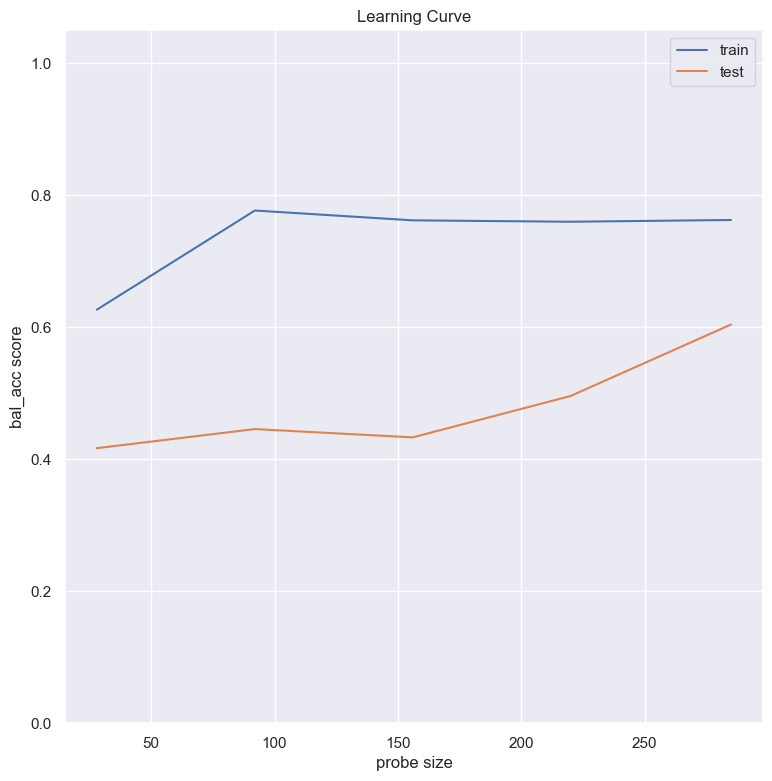

In [60]:
ax = sns.lineplot(x=train_sizes, y=train_scores_mean, label="train")
sns.lineplot(x=train_sizes, y=test_scores_mean, label="test", ax=ax)
ax.set_xlabel("probe size")
ax.set_ylabel("bal_acc score")
ax.set(ylim=(0, 1.05))
ax.set_title("Learning Curve")

##### Jak widać na wykresie, model po optymalizacji hiperparametrów, nie tylko zwiększył się wynik metryki Balanced Accuracy, zmniejszyło się również przeuczenie modelu, przy maksymalnej próbce danych, wyniki metryki są bardzo porównywalne ze zbiorem testowym.

Tak prezentujący się model osiąga 60,5% poprawnych predykcji oceny z testu z uwzględnieniem wag ocen

## Analiza istotności predyktorów
Które zmienne mają najwięskzy wpływ na wynik końcowy testu z matematyki?

<AxesSubplot:>

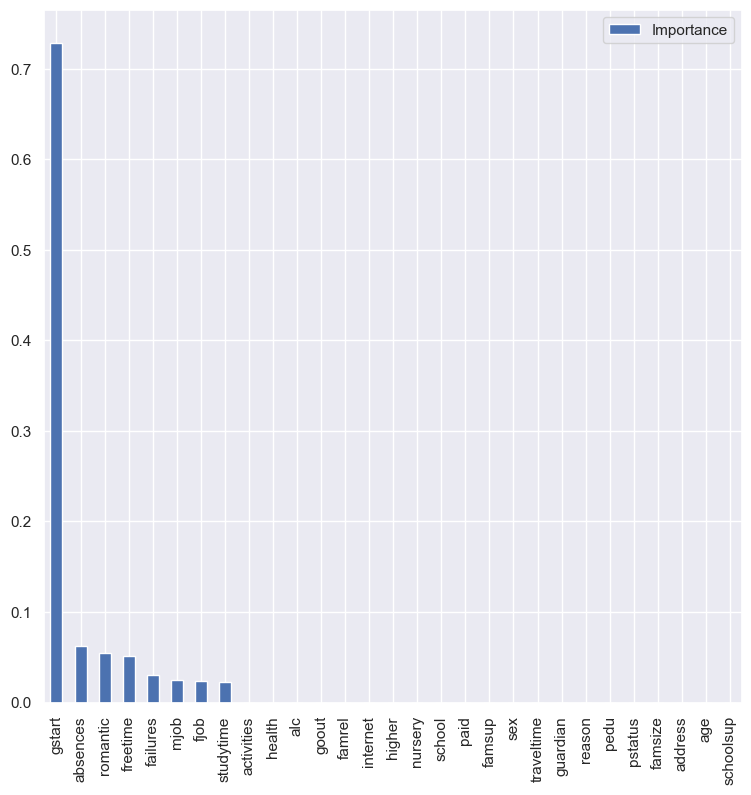

In [61]:
feat_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar')

## Wnioski

Najważniejszym predyktorem dla wyniku testu końcowego jest wynik wcześniejszego testu, czynnikami, które w mniejszym stopniu, ale jeszcze wartym uwagi, mają wpływ na wynik egzaminu są w kolejności: nieobecności, relacje romantyczne, ilość czasu wolnego po szkole, liczba wcześniejszych niepowodzeń, zawody rodziców oraz na samym końcu - czas poświęcony na naukę.

Model uzyskiwał przeciętne wyniki predykcji - 60,5% dla metryki balanced accuracy, co może być albo powodem niewłaściwego doboru modelu z parametrami, albo można zaryzykować stwierdzenie, że wyniku egzaminu ucznia nie da się przewidzieć (lub da się z niewielką skutecznością). Szczególnie przy braku wyniku testu poprzedzającego egzamin końcowy wyniki predykcji mogłyby być zupełnie niewiarygodne.

Wszelkie parametry (bez uwzględnienia wyniku egzaminu poprzedzającego), nawet takie jak ilość czasu spędzonego na nauce, nie wnoszą znaczących zmian w modelu, może to wynikać z tego, że każdy uczeń jest inny i nie wszyscy potrzebują dużo czasu, aby się nauczyć. W związku z niewielką istotnością zmiennych opisowych, innych niż egzamin poprzedzający, można przywołać powiedzenie "nie oceniaj książki po okładce", które ma tutaj zastosowanie, ponieważ jeśli naszym zadaniem byłoby przewidzenie wyników ucznia na egzaminie, do momentu przeprowadzenia egzaminu próbnego, zadanie to nie ma większego sensu i jest niemożliwe do wykonania w sposób wiarygodny.

Podsumowując przewidywanie wyniku egzaminu ucznia jest niezwykle trudnym zadaniem, najlepszym i prawdopodobnie jedynym predyktorem w tym celu jest wynik z egzaminu próbnego (lub innego, poprzedzającego)  